In [101]:
#This notebook looks at first contignecy only analsis with senor. 
#first calculates rew probabilities that reset every session. ewma, rolling instead if wanted


In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import statistics
from scipy.optimize import curve_fit


In [37]:
#Do all the intro stuff, find when day, cont, session, stem change.
df = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/senor_clean_contingencies_only_parsed_data.csv')
df #df is the dataframe containing the entire csv
# df['day']= df['date'].ne(df['date'].shift()).cumsum()
# df['diff_cont'] = df['contingency'].ne(df['contingency'].shift())
# df['cont_num'] = df.groupby(['day','session'])['diff_cont'].cumsum()
# del df['diff_cont']
# df['new_cont'] = df['cont_num'].ne(df['cont_num'].shift())
# df['day_chng'] = df['day'].ne(df['day'].shift())
# df['stem_switch'] = df['stem'].ne(df['stem'].shift())
# # df["stemChange"] = (df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"]).astype(int) #better way to calc?
# for ix in range(len(df)):
#     cont= str(df.loc[ix, 'contingency'])
#     cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
#     cont = [int(i) for i in cont]
#     df.loc[ix, 'glob_nom_avg'] = statistics.mean(cont)
# df['sess_chng'] = df['session'].ne(df['session'].shift()).cumsum()
# df

# #weird stuff going on day two, consult notes and consider using these sessions or not? or to what extent? 
# #note for future emily! bc of contingency switch problems (having a session of 2, and 4 on d2 s5, 
# #I wrote hard code using trial nums. should work for most rats?
# # for ix in range(len(df)):
# #     if df.loc[ix,'trial']<60:
# #         df.loc[ix,'cont_num']=1
# #     elif df.loc[ix,'trial']>119:
# #         df.loc[ix,'cont_num']=3
# #     else:
# #         df.loc[ix,'cont_num'] =2
df['day']= df['date'].ne(df['date'].shift()).cumsum()
#df['diff_cont'] = df.groupby(['day','session'],group_keys=True)['contingency']

# for ix in range(len(df)):
#     if df.loc[ix,'trial']<60:
#         df.loc[ix,'cont_num']=1
#     elif df.loc[ix,'trial']>119:
#         df.loc[ix,'cont_num']=3
#     else:
#         df.loc[ix,'cont_num'] =2

#df['diff_cont'] = df.

df['diff_cont'] = df['contingency'].ne(df['contingency'].shift())


df['cont_num'] = df.groupby(['day','session'])['diff_cont'].cumsum()
del df['diff_cont']
df['new_cont'] = df['cont_num'].ne(df['cont_num'].shift()).cumsum()

df['day_chng'] = df['day'].ne(df['day'].shift())
df['stem_switch'] = df['stem'].ne(df['stem'].shift())
for ix in range(len(df)):
    if df.loc[ix,'trial']==0:
        df.loc[ix,'stem_switch']= True
df['bout_num'] = df['stem'].ne(df['stem'].shift()).cumsum()



# df["stemChange"] = (df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"]).astype(int) #better way to calc?
for ix in range(len(df)):
    cont= str(df.loc[ix, 'contingency'])
    cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
    cont = [int(i) for i in cont]
    df.loc[ix, 'glob_nom_avg'] = statistics.mean(cont)
df['sess_chng'] = df['session'].ne(df['session'].shift()).cumsum()
obj = ['day', 'session', 'stem']

df['rew_count_session'] = df.groupby(obj)[['reward']].cumsum()
# obj1 = ['day', 'session', 'stem','cont_num']
# df[]
df[0:5]


,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,new_cont,day_chng,stem_switch,bout_num,glob_nom_avg,sess_chng,rew_count_session
0,0,4,B,1,805020202050,20201028,1,0,1,1,1,True,True,1,40.0,1,1
1,1,1,A,0,805020202050,20201028,1,1,1,1,1,False,True,2,40.0,1,0
2,2,2,A,0,805020202050,20201028,1,2,1,1,1,False,False,2,40.0,1,0
3,3,3,B,1,805020202050,20201028,1,3,1,1,1,False,True,3,40.0,1,2
4,4,4,B,0,805020202050,20201028,1,4,1,1,1,False,False,3,40.0,1,2


In [38]:
#Make a column for each stem chosen, similar to binframe
df.loc[df.stem == "A", "ChooseA"] = "1"
df.loc[df.stem == "B", "ChooseB"] = "1"
df.loc[df.stem == "C", "ChooseC"] = "1"
df['ChooseA'] = df['ChooseA'].fillna(0)
df['ChooseB'] = df['ChooseB'].fillna(0)
df['ChooseC'] = df['ChooseC'].fillna(0)

In [39]:
#calc rolling avg with window=10, then find best stem of the three at that moment 
#and when rat is at best stem 

# obj = ['day', 'session', 'stem']
# df['rew_rate'] = df.groupby(obj)[['reward']].transform(lambda x: x.rolling(10, 1).mean())
# #apply(lambda x: x['X1'].ewm(halflife=10).mean())
# df['rolling_avg_A'] =df[df['stem']=='A']['rew_rate']
# df['rolling_avg_B'] =df[df['stem']=='B']['rew_rate']
# df['rolling_avg_C'] =df[df['stem']=='C']['rew_rate']


# cols = ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']
# # df.loc[(df['session'] ==1) & (df['trial']==0),'rolling_avg_A'] = 0
# # df.loc[(df['session'] ==1) & (df['trial']==0),'rolling_avg_C'] = 0
# df.loc[(df['trial']==0),'rolling_avg_A'] = 0
# df.loc[(df['trial']==0),'rolling_avg_B'] = 0
# df.loc[(df['trial']==0),'rolling_avg_C'] = 0

# df.loc[:,cols] = df.loc[:,cols].ffill()

# equal = (df['rolling_avg_A'] == df['rolling_avg_B']) | (df['rolling_avg_B'] == df['rolling_avg_C']) | (df['rolling_avg_A'] == df['rolling_avg_C'])
# df['best_stem'] = df.loc[~equal, ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']].idxmax(axis=1)

# df['best_stem2'] = df.loc[equal, ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']].idxmax(axis=1)
# df
# replace_index = df.loc[(df['best_stem2'] =='rolling_avg_A')].index
# df.loc[replace_index,'best_stem2'] = 'A'
# replace_index = df.loc[(df['best_stem2'] =='rolling_avg_B')].index
# df.loc[replace_index,'best_stem2'] = 'B'
# replace_index = df.loc[(df['best_stem2'] =='rolling_avg_C')].index
# df.loc[replace_index,'best_stem2'] = 'C'

# replace_index = df.loc[(df['best_stem'] =='rolling_avg_A')].index
# df.loc[replace_index,'best_stem'] = 'A'
# replace_index = df.loc[(df['best_stem'] =='rolling_avg_B')].index
# df.loc[replace_index,'best_stem'] = 'B'
# replace_index = df.loc[(df['best_stem'] =='rolling_avg_C')].index
# df.loc[replace_index,'best_stem'] = 'C'

# df['at_best'] = np.where( df['stem'] == df['best_stem'] , '1', '0')
# df['at_best2'] = np.where( df['stem'] == df['best_stem2'] , '1', '0')
# df['best_all'] = df['at_best'] +df['at_best2']
# # del df['at_best']
# # del df['at_best2']
# Not_at_Best = df[df['best_all']=='00']
# at_best = df[df['best_all']=='01'] 
# at_best2 = df[df['best_all']=='10']

# df.loc[(df['best_all'] =='01'),'best_all']= 1
# df.loc[(df['best_all'] =='10'),'best_all']= 1
# df.loc[(df['best_all'] =='00'),'best_all']= 0

# del df['at_best']
# del df['at_best2']


In [40]:
#calc reward rate starting at new day, session for each stem
obj = ['day', 'session', 'stem']
df['rew_rate'] = df.groupby(obj)[['reward']].apply(lambda x: x.ewm(halflife=5).mean())
df['rolling_avg_A'] =df[df['stem']=='A']['rew_rate']
df['rolling_avg_B'] =df[df['stem']=='B']['rew_rate']
df['rolling_avg_C'] =df[df['stem']=='C']['rew_rate']


cols = ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']
# df.loc[(df['session'] ==1) & (df['trial']==0),'rolling_avg_A'] = 0
# df.loc[(df['session'] ==1) & (df['trial']==0),'rolling_avg_C'] = 0
df.loc[(df['trial']==0),'rolling_avg_A'] = 0
df.loc[(df['trial']==0),'rolling_avg_B'] = 0
df.loc[(df['trial']==0),'rolling_avg_C'] = 0

df.loc[:,cols] = df.loc[:,cols].ffill()

equal = (df['rolling_avg_A'] == df['rolling_avg_B']) | (df['rolling_avg_B'] == df['rolling_avg_C']) | (df['rolling_avg_A'] == df['rolling_avg_C'])
df['best_stem'] = df.loc[~equal, ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']].idxmax(axis=1)

df['best_stem2'] = df.loc[equal, ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']].idxmax(axis=1)
df
replace_index = df.loc[(df['best_stem2'] =='rolling_avg_A')].index
df.loc[replace_index,'best_stem2'] = 'A'
replace_index = df.loc[(df['best_stem2'] =='rolling_avg_B')].index
df.loc[replace_index,'best_stem2'] = 'B'
replace_index = df.loc[(df['best_stem2'] =='rolling_avg_C')].index
df.loc[replace_index,'best_stem2'] = 'C'

replace_index = df.loc[(df['best_stem'] =='rolling_avg_A')].index
df.loc[replace_index,'best_stem'] = 'A'
replace_index = df.loc[(df['best_stem'] =='rolling_avg_B')].index
df.loc[replace_index,'best_stem'] = 'B'
replace_index = df.loc[(df['best_stem'] =='rolling_avg_C')].index
df.loc[replace_index,'best_stem'] = 'C'

df['at_best'] = np.where( df['stem'] == df['best_stem'] , '1', '0')
df['at_best2'] = np.where( df['stem'] == df['best_stem2'] , '1', '0')
df['best_all'] = df['at_best'] +df['at_best2']
# del df['at_best']
# del df['at_best2']
Not_at_Best = df[df['best_all']=='00']
at_best = df[df['best_all']=='01'] 
at_best2 = df[df['best_all']=='10']

df.loc[(df['best_all'] =='01'),'best_all']= 1
df.loc[(df['best_all'] =='10'),'best_all']= 1
df.loc[(df['best_all'] =='00'),'best_all']= 0

del df['at_best']
del df['at_best2']



In [41]:
#finding best stem, adding to new col in df
for ix in range(len(df)):
    cont= str(df.loc[ix, 'contingency'])
    cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
    cont = [int(i) for i in cont]
    avg_A= statistics.mean(cont[0:2])
    avg_B = statistics.mean(cont[2:4])
    avg_C= statistics.mean(cont[4:6])
    if avg_A != avg_B & avg_B!=avg_C & avg_A!=avg_C:
        if (avg_A < avg_B) & (avg_A< avg_C):
            worst_stem = 'A'
        elif (avg_B < avg_A) & (avg_B< avg_C):
            worst_stem = 'B'
        elif (avg_C < avg_B) & (avg_C<avg_A):
            worst_stem = 'C'    
        df.loc[ix, 'worst_stem'] = worst_stem
    

In [42]:
#just to check what the average looks like 
df[60:70]
#Noticing that the first few values are not accurate- probably for the start of every session. 
#should fix that! Although best stem calc gets around it, at least at first 
#So here he goes A, and gets 1/3. so mabye he's thinking that another is better, 
#A isnt the best just bc its the only one he visited. 
#

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,ChooseB,ChooseC,rew_rate,rolling_avg_A,rolling_avg_B,rolling_avg_C,best_stem,best_stem2,best_all,worst_stem
60,60,1,A,0,202050205080,20201028,1,60,1,2,...,0,0,0.587469,0.587469,0.18427,0.308358,A,NaN,1,A
61,61,2,A,0,202050205080,20201028,1,61,1,2,...,0,0,0.510372,0.510372,0.18427,0.308358,A,NaN,1,A
62,62,1,A,1,202050205080,20201028,1,62,1,2,...,0,0,0.574514,0.574514,0.18427,0.308358,A,NaN,1,A
63,63,2,A,0,202050205080,20201028,1,63,1,2,...,0,0,0.499369,0.499369,0.18427,0.308358,A,NaN,1,A
64,64,1,A,0,202050205080,20201028,1,64,1,2,...,0,0,0.434140,0.434140,0.18427,0.308358,A,NaN,1,A
65,65,2,A,0,202050205080,20201028,1,65,1,2,...,0,0,0.377499,0.377499,0.18427,0.308358,A,NaN,1,A
66,66,1,A,0,202050205080,20201028,1,66,1,2,...,0,0,0.328297,0.328297,0.18427,0.308358,A,NaN,1,A
67,67,2,A,0,202050205080,20201028,1,67,1,2,...,0,0,0.285546,0.285546,0.18427,0.308358,C,NaN,0,A
68,68,1,A,0,202050205080,20201028,1,68,1,2,...,0,0,0.248391,0.248391,0.18427,0.308358,C,NaN,0,A
69,69,5,C,0,202050205080,20201028,1,69,1,2,...,0,1,0.263568,0.248391,0.18427,0.263568,C,NaN,1,A


In [43]:
#make a new df that only includes first contingency (can change to be two or three)
only_first_cont = df[df['cont_num'] == 1]
only_first_cont

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,ChooseB,ChooseC,rew_rate,rolling_avg_A,rolling_avg_B,rolling_avg_C,best_stem,best_stem2,best_all,worst_stem
0,0,4,B,1,805020202050,20201028,1,0,1,1,...,1,0,1.000000,0.000000,0.000000,0.000000,NaN,A,0,B
1,1,1,A,0,805020202050,20201028,1,1,1,1,...,0,0,0.000000,0.000000,0.000000,0.000000,NaN,A,1,B
2,2,2,A,0,805020202050,20201028,1,2,1,1,...,0,0,0.000000,0.000000,0.000000,0.000000,NaN,A,1,B
3,3,3,B,1,805020202050,20201028,1,3,1,1,...,1,0,1.000000,0.000000,1.000000,0.000000,NaN,B,1,B
4,4,4,B,0,805020202050,20201028,1,4,1,1,...,1,0,0.619542,0.000000,0.619542,0.000000,NaN,B,1,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13168,13168,5,C,1,202020505080,20201107,6,55,11,1,...,0,1,0.785350,0.366389,0.439566,0.785350,C,NaN,1,A
13169,13169,6,C,1,202020505080,20201107,6,56,11,1,...,0,1,0.813199,0.366389,0.439566,0.813199,C,NaN,1,A
13170,13170,5,C,0,202020505080,20201107,6,57,11,1,...,0,1,0.707725,0.366389,0.439566,0.707725,C,NaN,1,A
13171,13171,6,C,0,202020505080,20201107,6,58,11,1,...,0,1,0.615954,0.366389,0.439566,0.615954,C,NaN,1,A


In [44]:
#breaking it up into quarters of the expeirment to look for trends
#should be an easier way to do this (more efficient)
q1= only_first_cont.loc[1:len(only_first_cont)/4,'best_all']
q2= only_first_cont.loc[len(only_first_cont)/4:2*(len(only_first_cont)/4),'best_all']
q3 = only_first_cont.loc[2*len(only_first_cont)/4:3*(len(only_first_cont)/4),'best_all']
q4 = only_first_cont.loc[3*len(only_first_cont)/4:4*(len(only_first_cont)/4),'best_all']

(array([160.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200.]),
 array([0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001,
        0.7000000000000001, 0.8, 0.9, 1.0], dtype=object),
 <BarContainer object of 10 artists>)

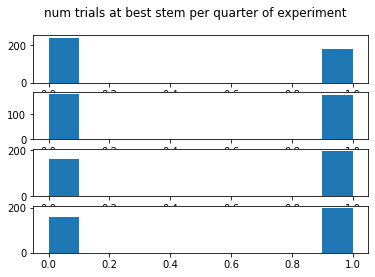

In [45]:
#plot how many times hes at the best vs not the best stem for each quarter
fig, axs = plt.subplots(4)
fig.suptitle('num trials at best stem per quarter of experiment' )
axs[0].hist(q1)
axs[1].hist(q2)# plt.hist(q2)
axs[2].hist(q3)
axs[3].hist(q4)
# plt.hist(q3)
# plt.hist(q4)


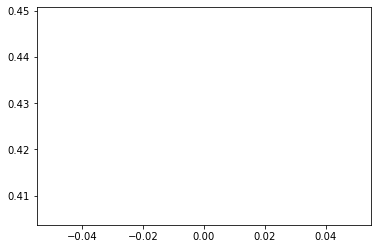

In [46]:
plt.plot(statistics.mean(q1))

Text(0, 0.5, 'avg prop trials at best stem per quarter')

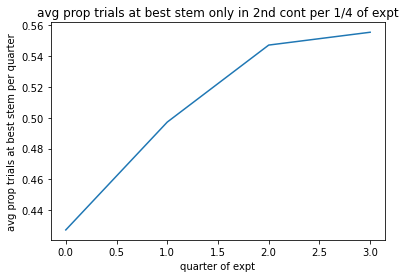

In [47]:
lst = [statistics.mean(q1),statistics.mean(q2),statistics.mean(q3),statistics.mean(q4)]
plt.plot(lst)
plt.title('avg prop trials at best stem only in 2nd cont per 1/4 of expt')
plt.xlabel('quarter of expt')
plt.ylabel('avg prop trials at best stem per quarter')
#should just do this on a session basis

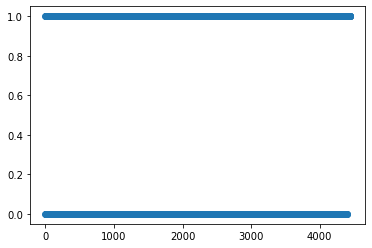

In [48]:
plt.scatter(range(len(only_first_cont)), only_first_cont['best_all'])

In [49]:
#want to split into more meaningful chunks. Mean per session? 
#make new variable new_sesh which  is number of sessions of expt
new_sesh = only_first_cont['sess_chng'].max()
only_first_cont

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,ChooseB,ChooseC,rew_rate,rolling_avg_A,rolling_avg_B,rolling_avg_C,best_stem,best_stem2,best_all,worst_stem
0,0,4,B,1,805020202050,20201028,1,0,1,1,...,1,0,1.000000,0.000000,0.000000,0.000000,NaN,A,0,B
1,1,1,A,0,805020202050,20201028,1,1,1,1,...,0,0,0.000000,0.000000,0.000000,0.000000,NaN,A,1,B
2,2,2,A,0,805020202050,20201028,1,2,1,1,...,0,0,0.000000,0.000000,0.000000,0.000000,NaN,A,1,B
3,3,3,B,1,805020202050,20201028,1,3,1,1,...,1,0,1.000000,0.000000,1.000000,0.000000,NaN,B,1,B
4,4,4,B,0,805020202050,20201028,1,4,1,1,...,1,0,0.619542,0.000000,0.619542,0.000000,NaN,B,1,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13168,13168,5,C,1,202020505080,20201107,6,55,11,1,...,0,1,0.785350,0.366389,0.439566,0.785350,C,NaN,1,A
13169,13169,6,C,1,202020505080,20201107,6,56,11,1,...,0,1,0.813199,0.366389,0.439566,0.813199,C,NaN,1,A
13170,13170,5,C,0,202020505080,20201107,6,57,11,1,...,0,1,0.707725,0.366389,0.439566,0.707725,C,NaN,1,A
13171,13171,6,C,0,202020505080,20201107,6,58,11,1,...,0,1,0.615954,0.366389,0.439566,0.615954,C,NaN,1,A


In [50]:

#for every session, make sesh_data df as 1 session at a time, then find 
#the mean of being at best of not (number of 1/s 0s)
#make a new list, appended for every session, with prop at best 

lst_prop_at_best_per_sesh = []
for ix in range(1,(only_first_cont['sess_chng'].max())): #for 1:num sessions 
    sesh_data = only_first_cont.loc[only_first_cont['sess_chng'] == ix]    #makes new df with only 1st cont of session
    #sesh_data = day_data.loc[day_data['session'] == ix]
    if len(sesh_data)>0:
        prop_trials_at_best = statistics.mean(sesh_data['best_all']) #mean num of 1/0 for being at experienced best
    lst_prop_at_best_per_sesh.append(prop_trials_at_best)
sesh_data

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,ChooseB,ChooseC,rew_rate,rolling_avg_A,rolling_avg_B,rolling_avg_C,best_stem,best_stem2,best_all,worst_stem
12933,12933,4,B,0,805020205020,20201107,5,0,11,1,...,1,0,0.000000,0.000000,0.000000,0.000000,NaN,A,0,B
12934,12934,3,B,1,805020205020,20201107,5,1,11,1,...,1,0,0.534602,0.000000,0.534602,0.000000,NaN,B,1,B
12935,12935,4,B,0,805020205020,20201107,5,2,11,1,...,1,0,0.331208,0.000000,0.331208,0.000000,NaN,B,1,B
12936,12936,3,B,1,805020205020,20201107,5,3,11,1,...,1,0,0.534602,0.000000,0.534602,0.000000,NaN,B,1,B
12937,12937,2,A,0,805020205020,20201107,5,4,11,1,...,0,0,0.000000,0.000000,0.534602,0.000000,NaN,B,0,B
12938,12938,1,A,1,805020205020,20201107,5,5,11,1,...,0,0,0.534602,0.534602,0.534602,0.000000,NaN,A,1,B
12939,12939,2,A,1,805020205020,20201107,5,6,11,1,...,0,0,0.711667,0.711667,0.534602,0.000000,A,NaN,1,B
12940,12940,1,A,1,805020205020,20201107,5,7,11,1,...,0,0,0.799355,0.799355,0.534602,0.000000,A,NaN,1,B
12941,12941,2,A,1,805020205020,20201107,5,8,11,1,...,0,0,0.851302,0.851302,0.534602,0.000000,A,NaN,1,B
12942,12942,1,A,1,805020205020,20201107,5,9,11,1,...,0,0,0.885387,0.885387,0.534602,0.000000,A,NaN,1,B


Text(0, 0.5, 'mean/prop trials at experienced best')

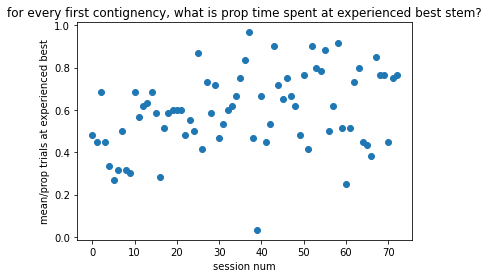

In [51]:
#plot it
plt.scatter(range(len(lst_prop_at_best_per_sesh)), lst_prop_at_best_per_sesh)
plt.title('for every first contignency, what is prop time spent at experienced best stem?')
plt.xlabel('session num')
plt.ylabel('mean/prop trials at experienced best')


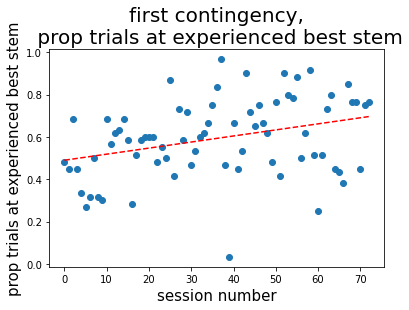

In [56]:
plt.scatter(range(len(lst_prop_at_best_per_sesh)), lst_prop_at_best_per_sesh)
plt.title('first contingency,\n prop trials at experienced best stem',fontsize=20)
plt.xlabel('session number',fontsize=15)
plt.ylabel('prop trials at experienced best stem',fontsize=15)
X = np.array(range(len(lst_prop_at_best_per_sesh)))
y = np.array(lst_prop_at_best_per_sesh)
#np.polyfit(np.log(X), y, 1)
z = np.polyfit(X, y, 1)
p = np.poly1d(z)
plt.plot(X,p(X),"r--")

Text(0, 0.5, 'prop trials at experienced best stem')

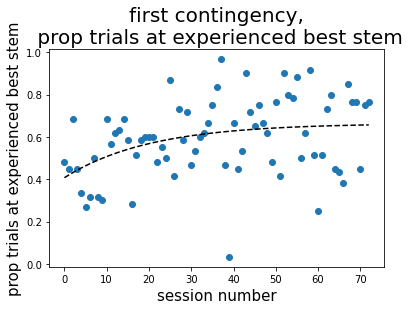

In [58]:
import scipy as scipy
from scipy import optimize
def exponential(x, a, k, b):
    return a*np.exp(x*k) + b
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, X, y, p0=[1,-0.5, 1])
plt.scatter(range(len(lst_prop_at_best_per_sesh)), lst_prop_at_best_per_sesh)
plt.plot(X, exponential(X, *popt_exponential), 'k--',)# \
         #label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))
plt.title('first contingency,\n prop trials at experienced best stem',fontsize=20)
plt.xlabel('session number',fontsize=15)
plt.ylabel('prop trials at experienced best stem',fontsize=15)

In [120]:
pop

NameError: name 'pop' is not defined

In [59]:
num_rew_per_sesh = []
for ix in range(1,(only_first_cont['sess_chng'].max())):
    sesh_data = only_first_cont.loc[only_first_cont['sess_chng'] == ix]   
    #sesh_data = day_data.loc[day_data['session'] == ix]
    num_rewards = (sesh_data['reward']).sum()
    num_rew_per_sesh.append(num_rewards)

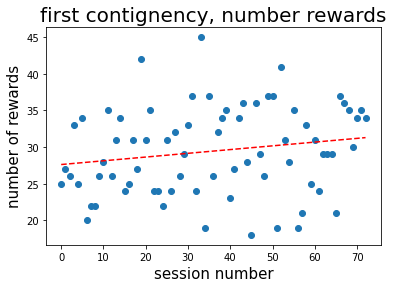

In [61]:
plt.scatter(range(len(num_rew_per_sesh)), num_rew_per_sesh)
plt.title('first contignency, number rewards', fontsize=20)
plt.xlabel('session number',fontsize=15)
plt.ylabel('number of rewards',fontsize=15)
X = np.array(range(len(num_rew_per_sesh)))
y = np.array(num_rew_per_sesh)
#np.polyfit(np.log(X), y, 1)
z = np.polyfit(X, y, 1)
p = np.poly1d(z)
plt.plot(X,p(X),"r--")


In [62]:
#num stem switches

#only_first_cont['stem_switch']
num_switch_per_sesh = []
for ix in range(1,(only_first_cont['sess_chng'].max())):
    sesh_data = only_first_cont.loc[only_first_cont['sess_chng'] == ix]   
    num_switch = (sesh_data['stem_switch']).sum()
    num_switch_per_sesh.append(num_switch)

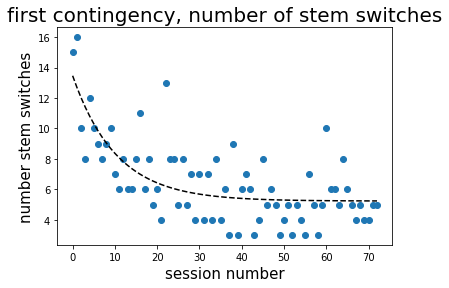

In [65]:
plt.scatter(range(len(num_switch_per_sesh)), num_switch_per_sesh)
plt.title('first contingency, number of stem switches',fontsize=20)
plt.xlabel('session number',fontsize=15)
plt.ylabel('number stem switches',fontsize=15)
y=np.array(num_switch_per_sesh)
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, X, y, p0=[6,-0.2, 6])
#plt.scatter(range(len(lst_prop_at_best_per_sesh)), lst_prop_at_best_per_sesh)
plt.plot(X, exponential(X, *popt_exponential), 'k--', \
         label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))


Text(0.5, 1.0, 'prop trials at best stem vs num stem switches')

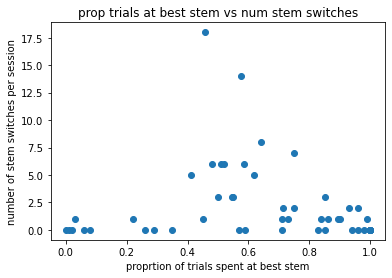

In [125]:
plt.scatter(lst_prop_at_best_per_sesh, num_switch_per_sesh)
plt.xlabel('proprtion of trials spent at best stem')
plt.ylabel('number of stem switches per session')
plt.title('prop trials at best stem vs num stem switches')

In [126]:
#actually I think i want rew avg to reset for every session (done!)

In [127]:
# I really want to get at this explore vs exploit thing. 
#I guess where I could start is at the beginning versus the end of each contingency, 
#how many stem switches? 

In [128]:
#overall goal is to split contingnency into quarts and look at number of bout switches. 



# sesh_data_quart = []
# #lst_prop_at_best_per_sesh = []
# for ix in range(1,(only_first_cont['sess_chng'].max())):
#     sesh_data = only_first_cont.loc[only_first_cont['sess_chng'] == ix]   
# #     for quart in range(4):
# #         if quart == 0:
# #             sesh_data1 = sesh_data[]
# #    sesh_data_quart = sesh_data 
#     prop_trials_at_best = statistics.mean(sesh_data['best_all'])
#     lst_prop_at_best_per_sesh.append(prop_trials_at_best)
    

In [129]:
# ix =1
# sesh_data = only_first_cont.loc[only_first_cont['sess_chng'] == ix] 
# for quart in range(4):
#         if quart == 0:
#             sesh_data1 = sesh_data.iloc[0:]

In [66]:
sesh_data_quart = []
split=4 

for ix in range(1,(only_first_cont['sess_chng'].max())):
    sesh_data = only_first_cont.loc[only_first_cont['sess_chng'] == ix]  
    for ix in range(4):
        if ix==0:
            sesh_data1= sesh_data.iloc[0:int(len(sesh_data)/split)]
        else:
            sesh_data1= sesh_data.iloc[ix*int(len(sesh_data)/split):2*ix*int(len(sesh_data)/split)]
        num_switch = (sesh_data1['stem_switch']).sum()
        sesh_data_quart.append(num_switch)

In [70]:
First_quart = sesh_data_quart[::4]
Second_quart = sesh_data_quart[1::4]
Third_quart = sesh_data_quart[2::4]
Fourth_quart = sesh_data_quart[3::4]
# First_e = sesh_data_quart[::8]
# Second_e = sesh_data_quart[1::8]
# Third_e = sesh_data_quart[2::8]
# Fourth_e = sesh_data_quart[3::8]
# Fift_e = sesh_data_quart[4::8]
# Sisxth_e = sesh_data_quart[5::8]
# Seventh_e = sesh_data_quart[6::8]
# Eighth_e = sesh_data_quart[7::8]

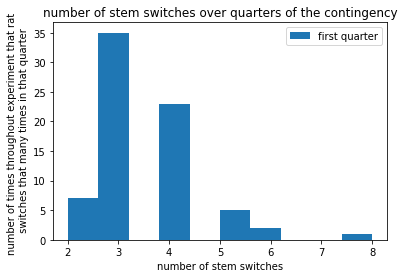

In [81]:
plt.hist(First_quart,alpha=1)
# plt.hist(Second_quart)#,alpha=)
# plt.hist(Third_quart)#,alpha=.6)
# plt.hist(Fourth_quart)#,alpha=.6)
# # plt.hist(fifth_eight)
# plt.hist(sixth_eight)
# plt.hist(seventh_eight)
# plt.hist(eighth_eight)
plt.title('number of stem switches over quarters of the contingency')
plt.xlabel('number of stem switches')
plt.ylabel('number of times throughout experiment that rat \n switches that many times in that quarter')
plt.legend(['first quarter','second quarter','third quarter','fourth quarter'])

Text(0, 0.5, 'mean number of stem switches')

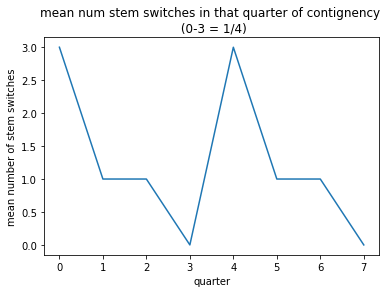

In [71]:
# lst = [statistics.mean(First_quart) , statistics.mean(Second_quart),statistics.mean(Third_quart),statistics.mean(Fourth_quart)]
lst = [statistics.mean(First_e) , statistics.mean(Second_e),statistics.mean(Third_e),statistics.mean(Fourth_e),statistics.mean(Fift_e) , statistics.mean(Sisxth_e),statistics.mean(Seventh_e),statistics.mean(Eighth_e)]


plt.plot(lst)
plt.title('mean num stem switches in that quarter of contignency \n (0-3 = 1/4)')
plt.xlabel('quarter')
plt.ylabel('mean number of stem switches')



In [ ]:
#could find how many non rewarded trials before leaving stem 
#find when rat changes stem, 
#statistics.mean(First_eight)


In [ ]:
#does this distribution change over experiment? 

In [134]:
first_half_expt_first_quart = First_quart[0: int(len(First_quart)/2)]
second_half_expt_first_quart = First_quart[int(len(First_quart)/2): 2* int(len(First_quart)/2)]
first_half_expt_second_quart = Second_quart[0: int(len(Second_quart)/2)]
second_half_expt_second_quart = Second_quart[int(len(Second_quart)/2): 2* int(len(Second_quart)/2)]
first_half_expt_third_quart = Third_quart[0: int(len(Third_quart)/2)]
second_half_expt_third_quart = Third_quart[int(len(Third_quart)/2): 2* int(len(Third_quart)/2)]
first_half_expt_fourth_quart = Fourth_quart[0: int(len(Fourth_quart)/2)]
second_half_expt_fourth_quart = Fourth_quart[int(len(Fourth_quart)/2): 2* int(len(Fourth_quart)/2)]

In [ ]:
# plt.hist(first_half_expt_first_quart)
# plt.hist(second_half_expt_first_quart)
# plt.title('first q of contingency, first vs second half of expt')

In [ ]:
# plt.hist(first_half_expt_second_quart)
# plt.hist(second_half_expt_second_quart)
# plt.title('second q of contingency, first vs second half of expt')

In [ ]:
# plt.hist(first_half_expt_third_quart)
# plt.hist(second_half_expt_third_quart)
# plt.title('third q of contingency, first vs second half of expt')

In [ ]:
# plt.hist(first_half_expt_fourth_quart)
# plt.hist(second_half_expt_fourth_quart)
# plt.title('fourth q of contingency, first vs second half of expt')

In [ ]:
# lst = [statistics.mean(first_half_expt_first_quart) , statistics.mean(first_half_expt_second_quart),statistics.mean(first_half_expt_third_quart),statistics.mean(first_half_expt_fourth_quart)]
# lst2 = [statistics.mean(second_half_expt_first_quart) , statistics.mean(second_half_expt_second_quart),statistics.mean(second_half_expt_third_quart),statistics.mean(second_half_expt_fourth_quart)]
# plt.plot(lst)
# plt.plot(lst2)
# plt.title('mean num stem switches in that quarter of contignency, first and second half of expt)')
# plt.xlabel('quarter')
# plt.ylabel('mean number of stem switches')



In [ ]:
# i really need to be able to attach rew to this. How is he getting information during each short bout? 
#maybe should start at looking at the ones where I know he has the strategy Im looking for. 

In [ ]:
ix = 20
sesh_data = only_first_cont.loc[only_first_cont['sess_chng'] == ix]   

In [ ]:
binframe = sesh_data[['ChooseA','ChooseB','ChooseC','reward']]
#binframe

In [135]:
swapConting = (sesh_data[sesh_data['cont_num'].ne(sesh_data['cont_num'].shift())].index).tolist()
newDays = (sesh_data[sesh_data['day'].ne(sesh_data['day'].shift())].index).tolist()
chgEpoch = (sesh_data[sesh_data['session'].ne(sesh_data['session'].shift())].index).tolist()

# binframe['ChooseA'] = [int(x) for x in binframe['ChooseA']]
# binframe['ChooseB'] = [int(x) for x in binframe['ChooseB']]
# binframe['ChooseC'] = [int(x) for x in binframe['ChooseC']]


# Alist = []
# for i,v in enumerate(binframe['reward']):
#     if binframe['ChooseA'][i] == '0':
#         Alist.append(0)
#     elif (binframe['ChooseA'][i] == '1') & (v==0):
#         Alist.append(1)
#     elif (binframe['ChooseA'][i] == '1') & (v==1):
#         Alist.append(2)
# Blist = []
# for i,v in enumerate(binframe['reward']):
#     if binframe['ChooseB'][i] == '0':
#         Alist.append(0)
#     elif (binframe['ChooseB'][i] == '1') & (v==0):
#         Alist.append(1)
#     elif (binframe['ChooseB'][i] == '1') & (v==1):
#         Alist.append(2)
# Clist = []
# for i,v in enumerate(binframe['reward']):
#     if binframe['ChooseC'][i] == '0':
#         Alist.append(0)
#     elif (binframe['ChooseC'][i] == '1') & (v==0):
#         Alist.append(1)
#     elif (binframe['ChooseC'][i] == '1') & (v==1):
#         Alist.append(2)        
        
# Alist= binframe['ChooseA'].tolist()
# Blist= binframe['ChooseB'].tolist()
# Clist= binframe['ChooseC'].tolist()

# Alist = [int(x) for x in Alist]
# Blist = [int(x) for x in Blist]
# Clist = [int(x) for x in Clist]

# binframe['ChooseA'] = [int(x) for x in binframe['ChooseA']]
# binframe['ChooseB'] = [int(x) for x in binframe['ChooseB']]
# binframe['ChooseC'] = [int(x) for x in binframe['ChooseC']]




# Alist = binframe['ChooseA']+binframe['reward']
# Blist = binframe['ChooseB']+binframe['reward']
# Clist = binframe['ChooseC']+binframe['reward']



In [136]:
# x=[i for i in range(0,len(binframe))]
# plt.figure(figsize = (200,40))
# plt.bar(x,Alist,width=1)
# plt.bar(x,Blist,width=1)
# plt.bar(x,Clist,width=1)
# plt.xlabel('trial #', fontsize = 16)
# plt.ylabel('reward outcome, 1=no, 2=yes', fontsize = 16)
# # plt.vlines(swapConting,-0.2,2.2,colors='black',linestyle='--',label='chg contingency')
# # plt.vlines(newDays,-0.2,2.2,colors='red',linestyle='-',label='new day')
# # plt.vlines(chgEpoch,-0.2,2.2,colors='pink',linestyle=':',label='chg epoch')
# plt.legend(['cont chg','new day','ep chg','A','B','C'],title='stem',loc='upper left', fontsize = 12)
# plt.title('senor stem visits and reward outcomes over trials', fontsize = 16)
# plt.show()

In [137]:
ix = 10
sesh_data = only_first_cont.loc[only_first_cont['sess_chng'] == ix]   

In [138]:
sesh_data

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,ChooseA,ChooseB,ChooseC,rew_rate,rolling_avg_A,rolling_avg_B,rolling_avg_C,best_stem,best_stem2,best_all
1815,1815,4,B,0,805020202050,20200216,3,100,4,1,...,0,1,0,0.541865,0.170810,0.541865,0.0,B,NaN,1
1816,1816,3,B,0,805020202050,20200216,3,101,4,1,...,0,1,0,0.471721,0.170810,0.471721,0.0,B,NaN,1
1817,1817,4,B,1,805020202050,20200216,3,102,4,1,...,0,1,0,0.540106,0.170810,0.540106,0.0,B,NaN,1
1818,1818,3,B,0,805020202050,20200216,3,103,4,1,...,0,1,0,0.470190,0.170810,0.470190,0.0,B,NaN,1
1819,1819,4,B,1,805020202050,20200216,3,104,4,1,...,0,1,0,0.538773,0.170810,0.538773,0.0,B,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,1910,1,A,1,805020202050,20200216,3,195,4,1,...,1,0,0,0.735656,0.735656,0.173463,0.0,A,NaN,1
1911,1911,2,A,0,805020202050,20200216,3,196,4,1,...,1,0,0,0.640421,0.640421,0.173463,0.0,A,NaN,1
1912,1912,1,A,0,805020202050,20200216,3,197,4,1,...,1,0,0,0.557515,0.557515,0.173463,0.0,A,NaN,1
1913,1913,2,A,1,805020202050,20200216,3,198,4,1,...,1,0,0,0.614797,0.614797,0.173463,0.0,A,NaN,1


In [139]:
#make bout_data, whcih is df that has for each bout, how long it was, how many rewrds he got, which stem is is. 
stem_switch_ix = sesh_data[sesh_data['stem_switch'] == 1].index
#for ix in range(len(stem_switch_ix)):
#    bout= sesh_data[sesh_data.where(sesh_data.index<stem_switch_ix)]

In [140]:
bout_metadata=[]
for ix in range(len(stem_switch_ix)):
    if ix< len(stem_switch_ix)-1:
        one_bout= sesh_data.loc[stem_switch_ix[ix]:stem_switch_ix[ix+1]-1]
    else:
        one_bout= sesh_data.loc[stem_switch_ix[ix]:sesh_data.max()[0]]
    num_rew = one_bout['reward'].sum()
    len_bout = len(one_bout)
    stem = one_bout['stem'].iloc[0]
    session = one_bout['session'].iloc[0]
    day = one_bout['day'].iloc[0]
    bout_metadata.append([len_bout,num_rew,stem,session,day])

In [141]:
cont_bouts_data = pd.DataFrame(bout_metadata, columns=['len_bout', 'num_rew', 'stem','session','day'])

ix

In [142]:
cont_bouts_data

,len_bout,num_rew,stem,session,day
0,6,0,C,3,4
1,69,49,A,3,4


In [143]:
stem_switch_ix

Int64Index([1840, 1846], dtype='int64')

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

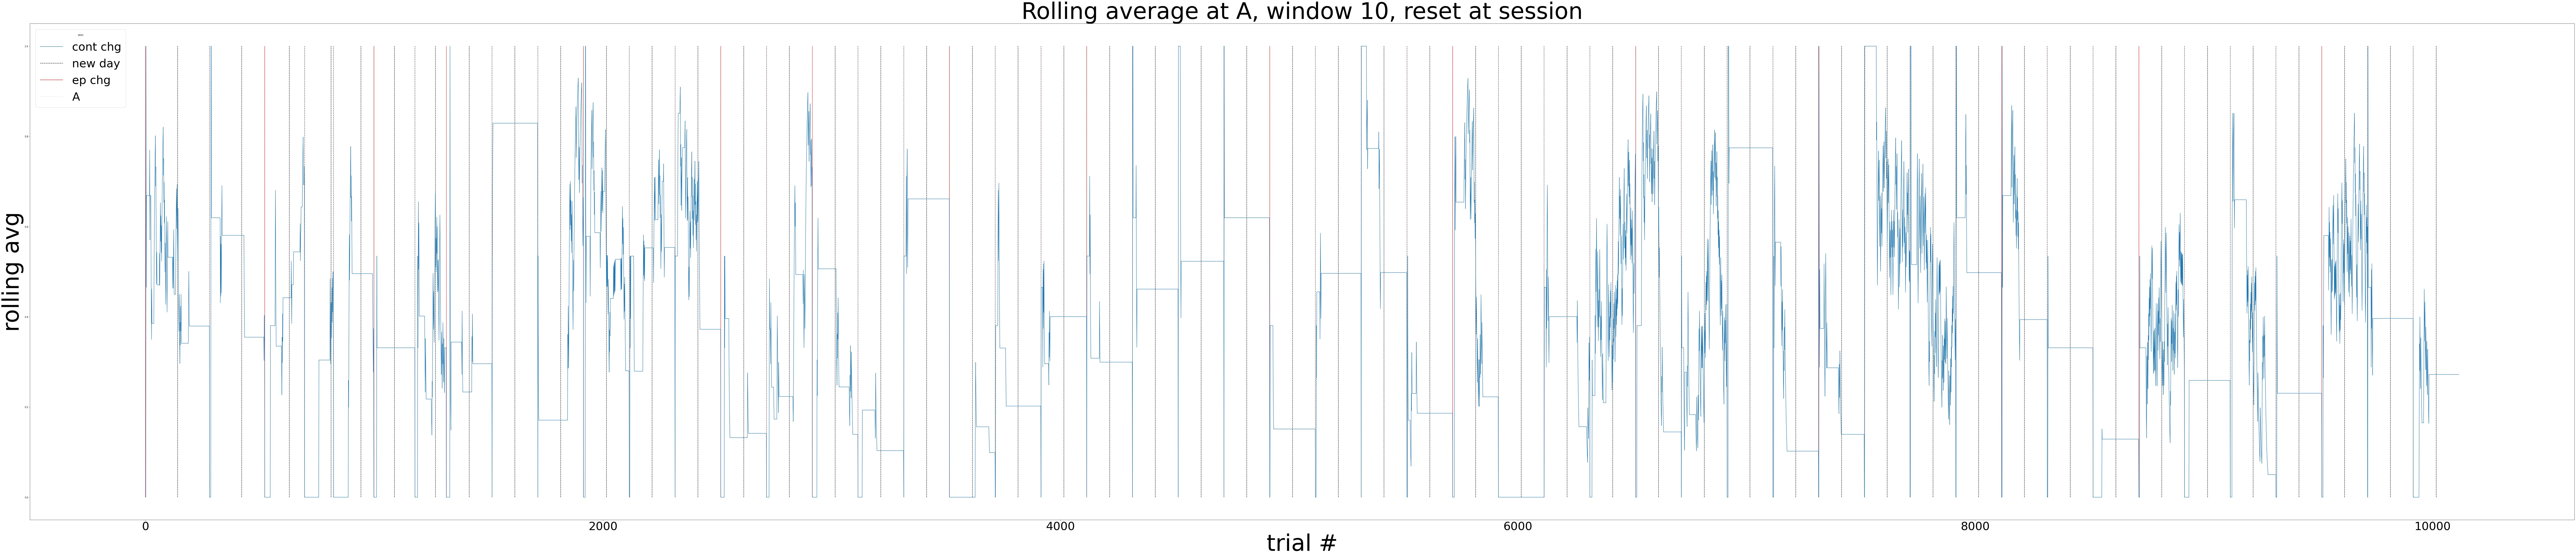

In [144]:
plt.figure(figsize = (200,40))
plt.plot(df['rolling_avg_A'])
plt.vlines(df[df['new_cont']==True].index,0,1,colors='black',linestyle='--',label='chg contingency')
plt.vlines(df[df['day_chng']==True].index,0,1,colors='red',linestyle='-',label='new day')
plt.vlines(df[df['sess_chng'].ne(df['sess_chng'].shift())==True].index,0,1,colors='pink',linestyle=':',label='chg epoch')
plt.legend(['cont chg','new day','ep chg','A','B','C'],title='stem',loc='upper left', fontsize = 50)
plt.xlabel('trial #', fontsize = 100)
plt.ylabel('rolling avg', fontsize = 100)
plt.title('Rolling average at A, window 10, reset at session',fontsize = 100)
plt.xticks(fontsize=50)
#plt.yticks(fontsize=50)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

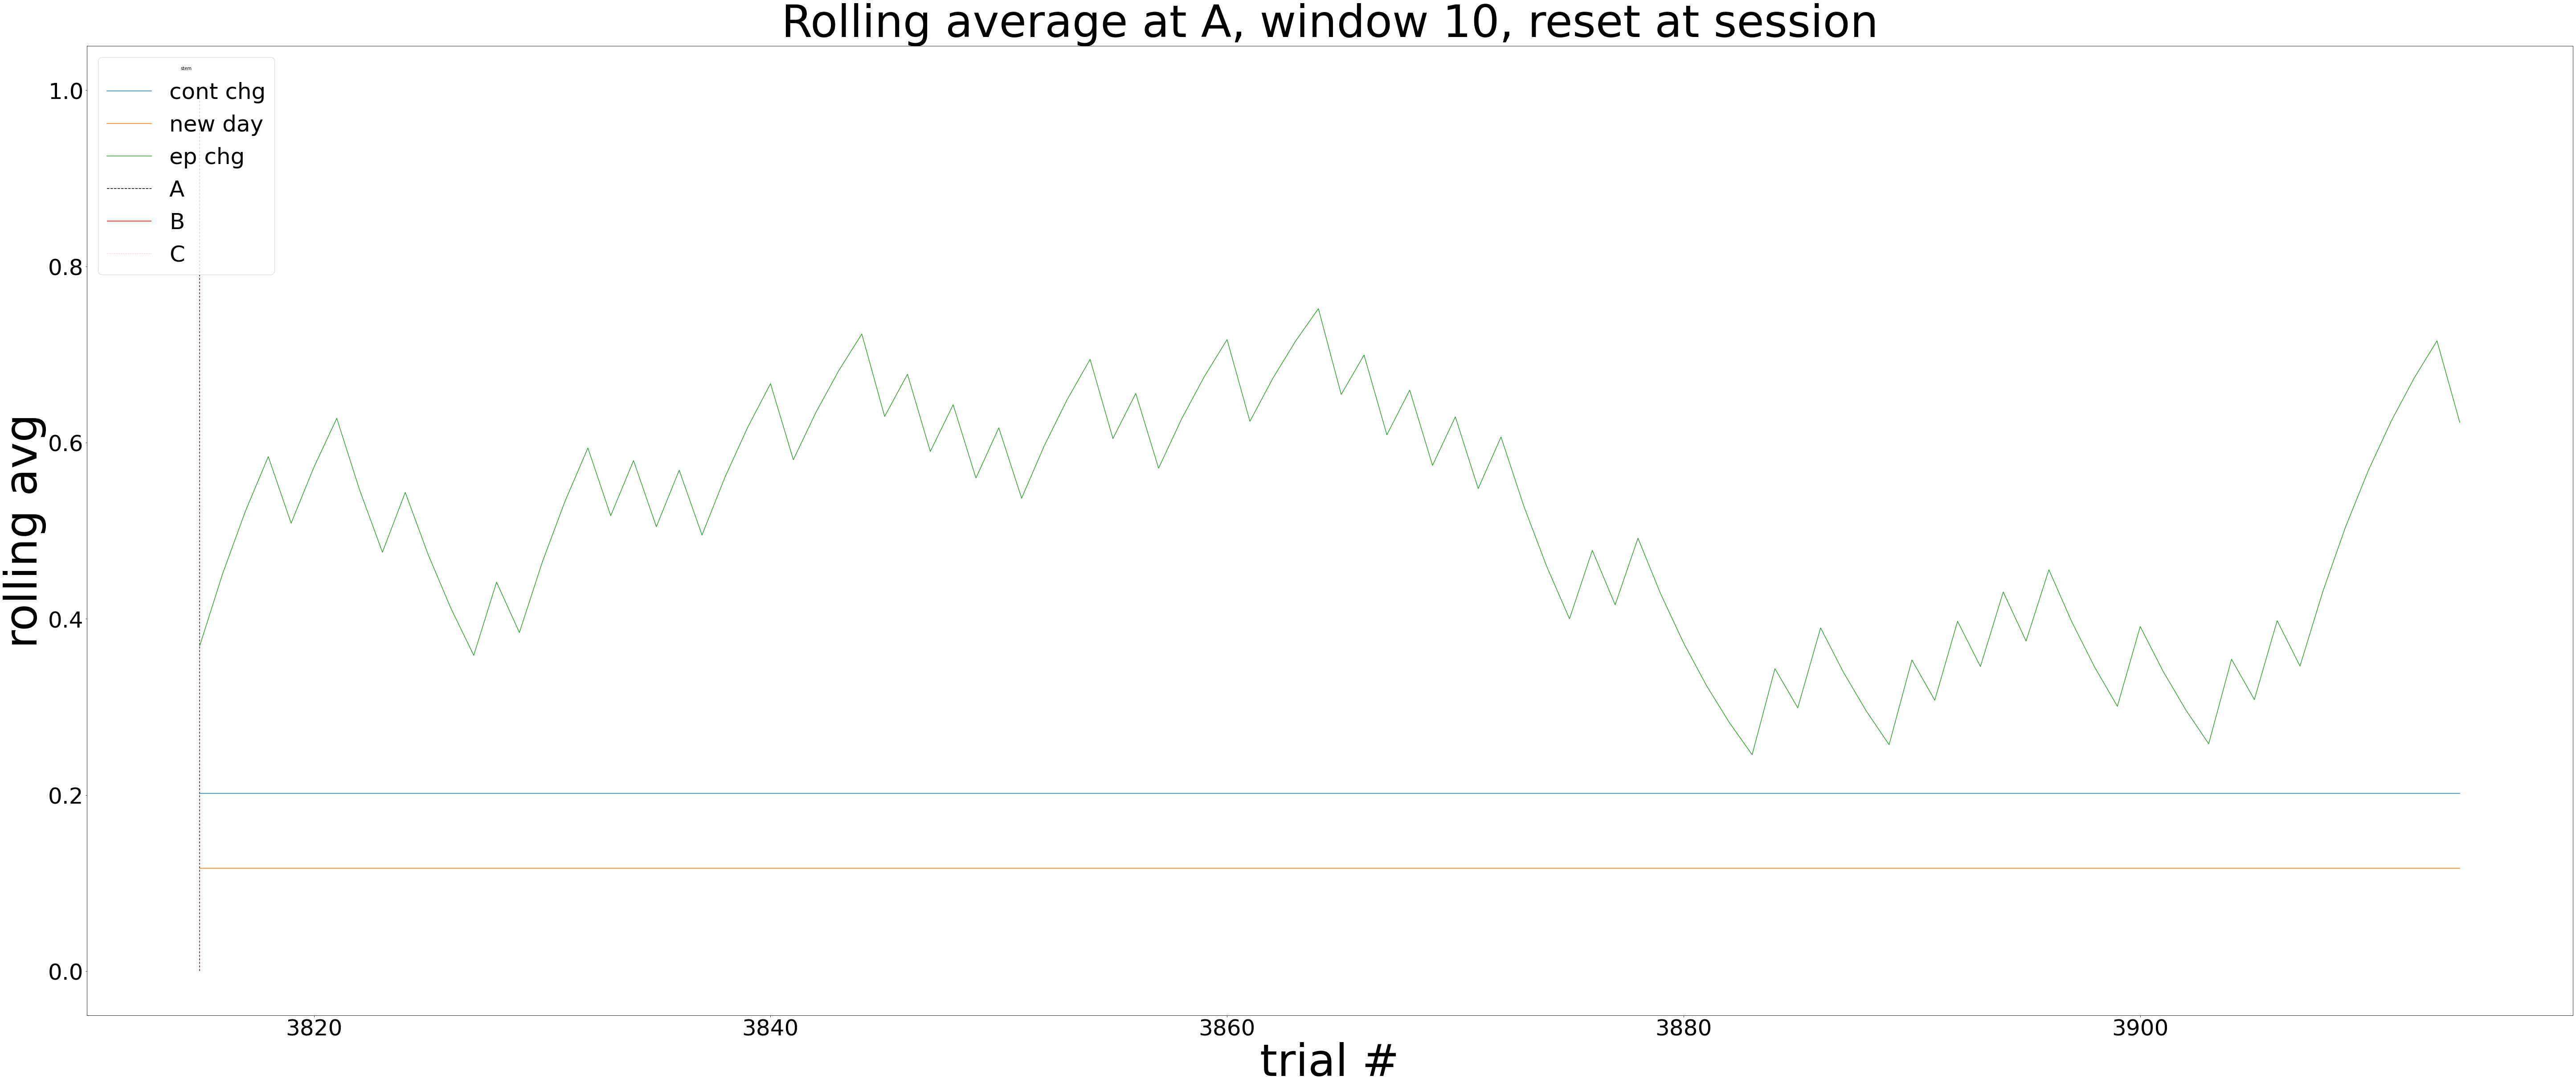

In [145]:
#plots ewma for example session
ix = 20
sesh_data = only_first_cont.loc[only_first_cont['sess_chng'] == ix]   

plt.figure(figsize = (100,40))
plt.plot(sesh_data['rolling_avg_A'])
plt.plot(sesh_data['rolling_avg_B'])
plt.plot(sesh_data['rolling_avg_C'])


plt.vlines(sesh_data[sesh_data['new_cont']==True].index,0,1,colors='black',linestyle='--',label='chg contingency')
plt.vlines(sesh_data[sesh_data['day_chng']==True].index,0,1,colors='red',linestyle='-',label='new day')
plt.vlines(sesh_data[sesh_data['sess_chng'].ne(sesh_data['sess_chng'].shift())==True].index,0,1,colors='pink',linestyle=':',label='chg epoch')
plt.legend(['cont chg','new day','ep chg','A','B','C'],title='stem',loc='upper left', fontsize = 50)
plt.xlabel('trial #', fontsize = 100)
plt.ylabel('rolling avg', fontsize = 100)
plt.title('Rolling average at A, window 10, reset at session',fontsize = 100)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

In [146]:
#find index of session change for no reason? im confused because it doesnt seemright either
df[df['sess_chng']==1].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            270, 271, 272, 273, 274, 275, 276, 277, 278, 279],
           dtype='int64', length=280)

In [147]:
df['sess_chng'].ne(df['sess_chng'].shift())

0         True
1        False
2        False
3        False
4        False
         ...  
10110    False
10111    False
10112    False
10113    False
10114    False
Name: sess_chng, Length: 10115, dtype: bool

In [148]:
#explore vs exploit

only_first_cont
#for ever session, find how many bouts less than 10, how many bouts more than 10


,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,ChooseA,ChooseB,ChooseC,rew_rate,rolling_avg_A,rolling_avg_B,rolling_avg_C,best_stem,best_stem2,best_all
0,0,4,B,1,805020802050,20200213,1,0,1,1,...,0,1,0,1.000000,0.000000,0.000000,0.000000,NaN,A,0
1,1,3,B,1,805020802050,20200213,1,1,1,1,...,0,1,0,1.000000,0.000000,1.000000,0.000000,NaN,B,1
2,2,1,A,1,805020802050,20200213,1,2,1,1,...,1,0,0,1.000000,1.000000,1.000000,0.000000,NaN,A,1
3,3,2,A,0,805020802050,20200213,1,3,1,1,...,1,0,0,0.465398,0.465398,1.000000,0.000000,B,NaN,0
4,4,1,A,1,805020802050,20200213,1,4,1,1,...,1,0,0,0.668792,0.668792,1.000000,0.000000,B,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10110,10110,3,B,0,508050208020,20200228,3,195,16,1,...,0,1,0,0.299933,0.272093,0.299933,0.095083,B,NaN,1
10111,10111,4,B,0,508050208020,20200228,3,196,16,1,...,0,1,0,0.261107,0.272093,0.261107,0.095083,A,NaN,0
10112,10112,3,B,1,508050208020,20200228,3,197,16,1,...,0,1,0,0.356756,0.272093,0.356756,0.095083,B,NaN,1
10113,10113,4,B,0,508050208020,20200228,3,198,16,1,...,0,1,0,0.310575,0.272093,0.310575,0.095083,B,NaN,1


In [149]:
#find how many bouts are less than 10 trials, how many are more for each session 
explore_exploit=[]
for sesh_bout in range(1, df['sess_chng'].max()):
    sesh_data = only_first_cont.loc[only_first_cont['sess_chng'] == sesh_bout] 
    stem_switch_ix = sesh_data[sesh_data['stem_switch'] == 1].index
    bout_metadata=[]
    for ix in range(len(stem_switch_ix)):
        if ix< len(stem_switch_ix)-1:
            one_bout= sesh_data.loc[stem_switch_ix[ix]:stem_switch_ix[ix+1]-1]
        else:
            one_bout= sesh_data.loc[stem_switch_ix[ix]:sesh_data.max()[0]]
        num_rew = one_bout['reward'].sum()
        len_bout = len(one_bout)
        stem = one_bout['stem'].iloc[0]
        session = one_bout['session'].iloc[0]
        day = one_bout['day'].iloc[0]
        bout_metadata.append([len_bout,num_rew,stem,session,day])
        cont_bouts_data = pd.DataFrame(bout_metadata, columns=['len_bout', 'num_rew', 'stem','session','day'])
    num_explore = (cont_bouts_data.len_bout<=10).sum()
    num_exploit = (cont_bouts_data.len_bout>10).sum()
    explore_exploit.append ([num_explore,num_exploit])
    #num_explore = bout_metadata<10
explore_exploit
#id like to show the progression of this within each contingnecy.
#at what point in the session is he exploiting, and what about when he exploits many? 


[[15, 3],
 [4, 2],
 [13, 1],
 [3, 0],
 [1, 1],
 [0, 1],
 [1, 0],
 [3, 3],
 [3, 3],
 [1, 1],
 [1, 4],
 [3, 3],
 [0, 2],
 [2, 1],
 [0, 3],
 [5, 2],
 [0, 1],
 [0, 1],
 [5, 3],
 [5, 3],
 [5, 3],
 [5, 3],
 [5, 3],
 [5, 1],
 [2, 1],
 [2, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 4],
 [1, 4],
 [0, 2],
 [0, 2],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1]]

In [150]:
explore_exploit1=[]
for ix in range(len(explore_exploit)):
    explore_exploit1.append(explore_exploit[ix]/sum(explore_exploit[ix]))

In [151]:
len(explore_exploit1)

50

In [152]:
sesh_data = only_first_cont.loc[only_first_cont['sess_chng'] == 1]
sesh_data


,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,ChooseA,ChooseB,ChooseC,rew_rate,rolling_avg_A,rolling_avg_B,rolling_avg_C,best_stem,best_stem2,best_all
0,0,4,B,1,805020802050,20200213,1,0,1,1,...,0,1,0,1.000000,0.000000,0.00000,0.000000,NaN,A,0
1,1,3,B,1,805020802050,20200213,1,1,1,1,...,0,1,0,1.000000,0.000000,1.00000,0.000000,NaN,B,1
2,2,1,A,1,805020802050,20200213,1,2,1,1,...,1,0,0,1.000000,1.000000,1.00000,0.000000,NaN,A,1
3,3,2,A,0,805020802050,20200213,1,3,1,1,...,1,0,0,0.465398,0.465398,1.00000,0.000000,B,NaN,0
4,4,1,A,1,805020802050,20200213,1,4,1,1,...,1,0,0,0.668792,0.668792,1.00000,0.000000,B,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,135,2,A,1,805020802050,20200213,1,135,1,1,...,1,0,0,0.684008,0.684008,0.44624,0.315637,A,NaN,1
136,136,1,A,0,805020802050,20200213,1,136,1,1,...,1,0,0,0.595461,0.595461,0.44624,0.315637,A,NaN,1
137,137,2,A,1,805020802050,20200213,1,137,1,1,...,1,0,0,0.647830,0.647830,0.44624,0.315637,A,NaN,1
138,138,1,A,1,805020802050,20200213,1,138,1,1,...,1,0,0,0.693419,0.693419,0.44624,0.315637,A,NaN,1


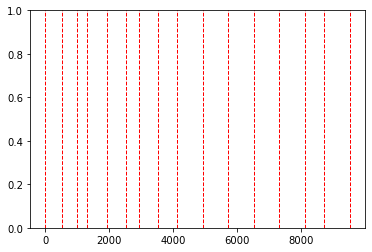

In [153]:
new =df['day'].ne(df['day'].shift())
Index = new[new].index-1
Index

for ix in range(len(Index)):
    plt.axvline(x=Index[ix],ymin = 0, ymax = 1, color ='red',linewidth = 1,linestyle ="--")
    

In [154]:

sessions_day_lst=[]
Index = df.loc[(new[new].index)].index-1
df_sess_per_day = df.loc[Index[1::]]
sessions = df_sess_per_day['session']
for ix in range(len(sessions)):
    if ix == 0: 
        sessions_day_lst.append(sessions.iloc[ix])
    else:
        sessions_day_lst.append(sessions.iloc[ix]+ sessions_day_lst[ix-1])
sessions_day_lst
# for ix in range(len(sessions_day_lst)):
#     plt.axvline(x=sessions_day_lst[ix],ymin = 0, ymax = 1, color ='red',linewidth = 1,linestyle ="--")
# for ix in range(len(Session_num)):
#     plt.axvline(x=Session_num[ix],ymin = 0, ymax = 1, color ='red',linewidth = 1,linestyle ="--")
df_sess_per_day

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,ChooseA,ChooseB,ChooseC,rew_rate,rolling_avg_A,rolling_avg_B,rolling_avg_C,best_stem,best_stem2,best_all
520,520,6,C,0,202050805020,20200213,3,240,1,2,...,0,0,1,0.339511,0.402871,0.508345,0.339511,B,NaN,0
997,997,1,A,1,505020505080,20200214,3,175,2,1,...,1,0,0,0.373944,0.373944,0.319585,0.353218,A,NaN,1
1314,1314,4,B,0,205080502080,20200215,2,136,3,1,...,0,1,0,0.309640,0.331479,0.309640,0.175481,A,NaN,0
1914,1914,1,A,1,805020202050,20200216,3,199,4,1,...,1,0,0,0.664663,0.664663,0.173463,0.000000,A,NaN,1
2514,2514,3,B,1,502050805050,20200217,3,199,5,1,...,0,1,0,0.706272,0.372271,0.706272,0.317191,B,NaN,1
2914,2914,2,A,1,508020202080,20200218,2,199,6,1,...,1,0,0,0.731412,0.731412,0.142891,0.328193,A,NaN,1
3514,3514,3,B,0,202020508050,20200219,3,199,7,1,...,0,1,0,0.485002,0.661380,0.485002,0.179976,A,NaN,0
4114,4114,3,B,1,205080205020,20200220,3,199,8,1,...,0,1,0,0.629493,0.400333,0.629493,0.568222,B,NaN,1
4914,4914,6,C,1,502020202080,20200221,4,199,9,2,...,0,0,1,0.407799,0.619542,0.042437,0.407799,A,NaN,0
5714,5714,5,C,0,805020202080,20200222,4,199,10,1,...,0,0,1,0.570446,0.186207,0.060160,0.570446,C,NaN,1


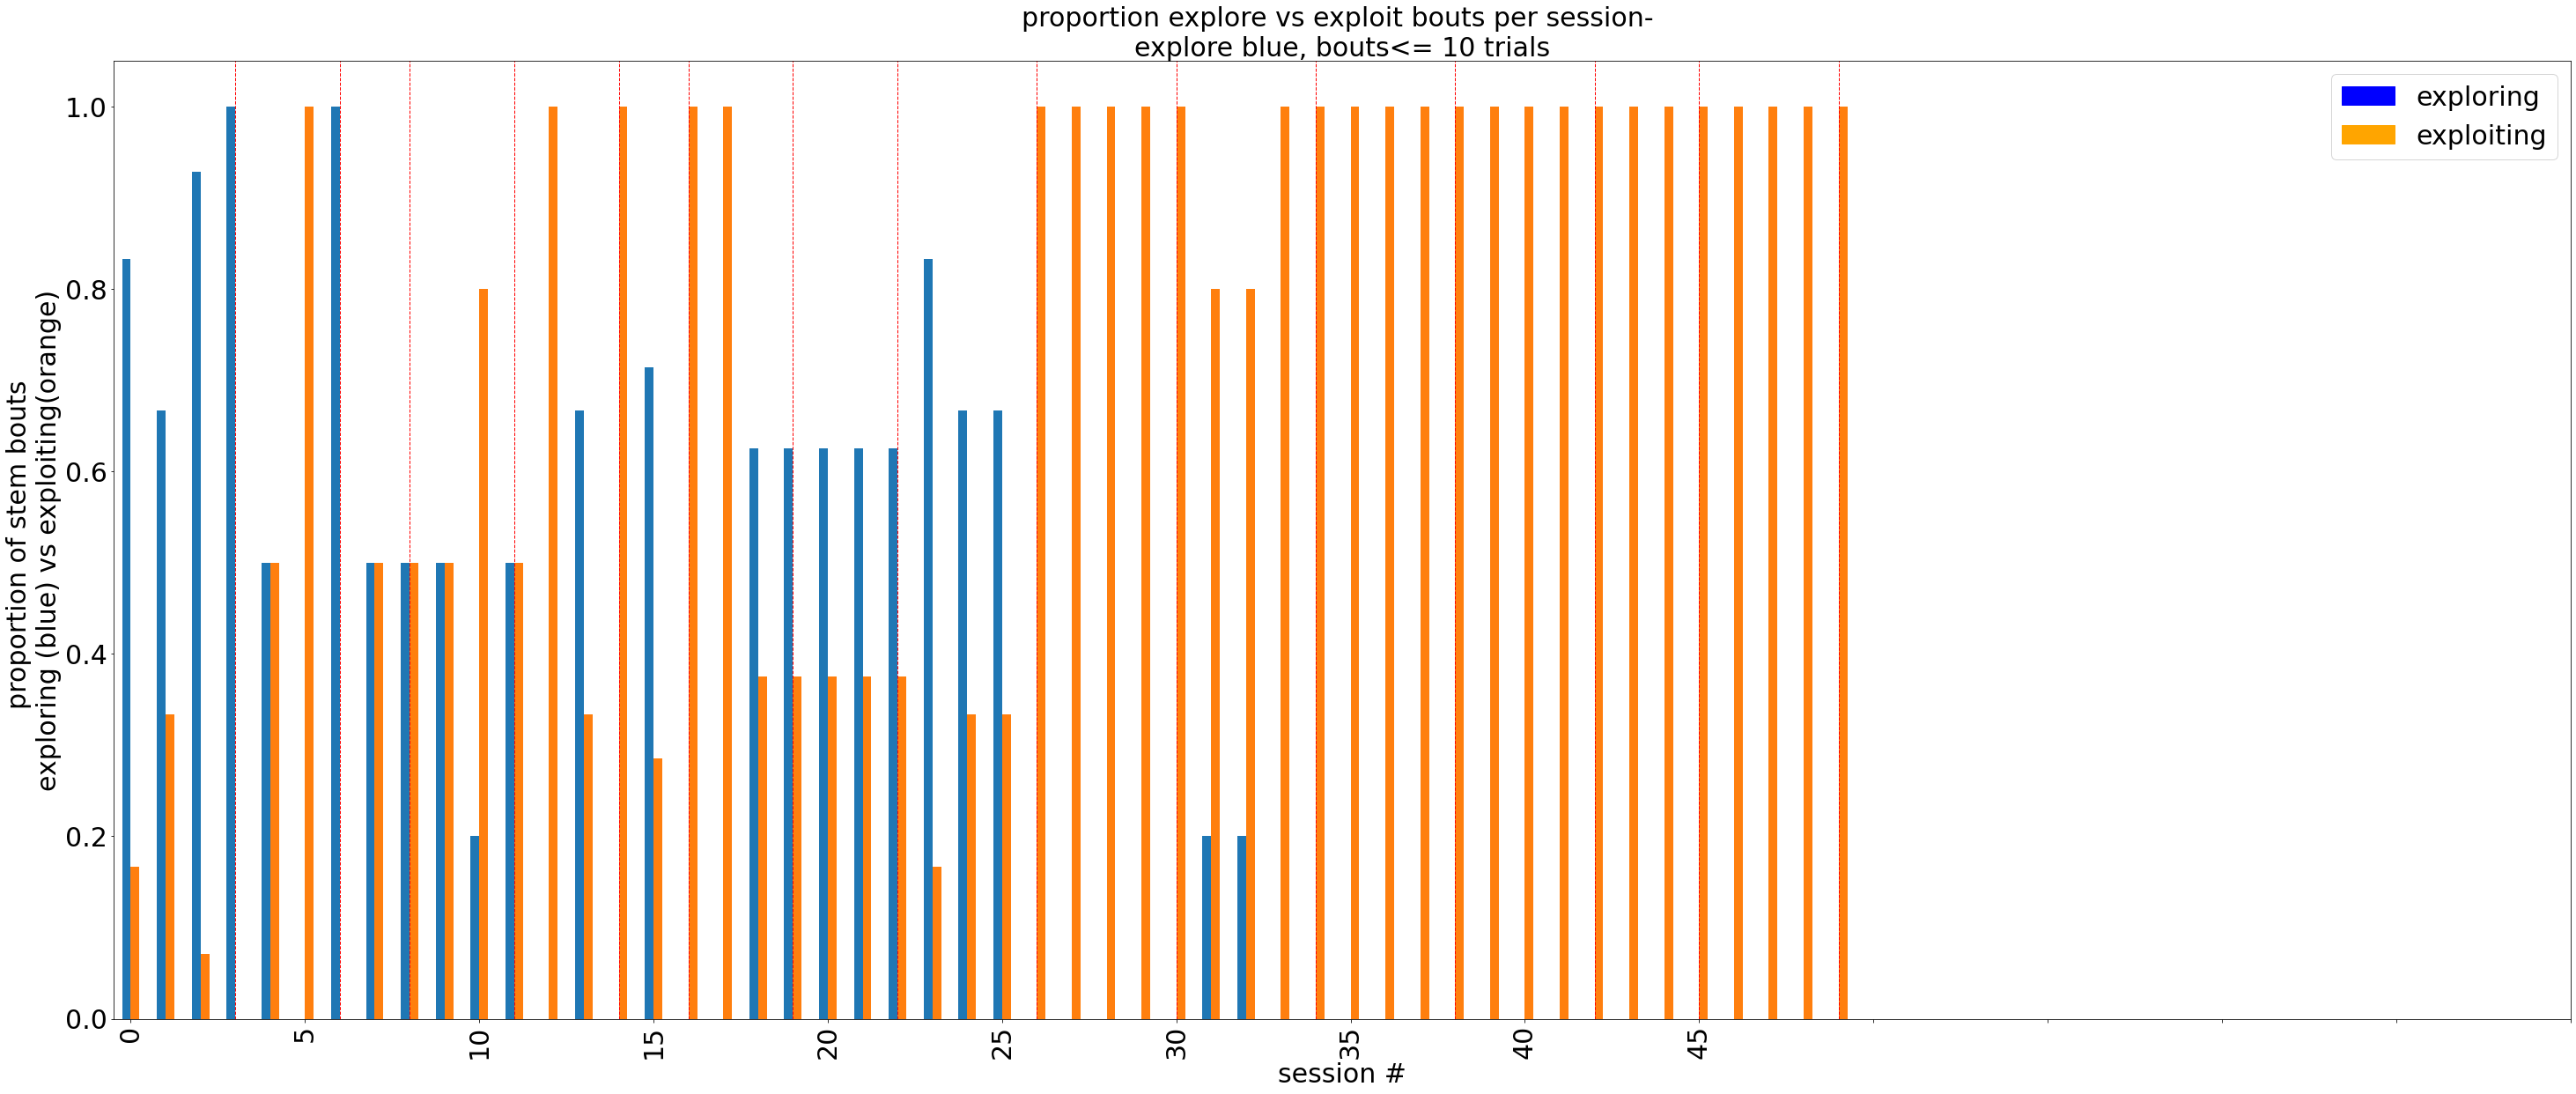

In [156]:
#plt.figure(figsize = (200,40))
# num_explore = (cont_bouts_data.len_bout<=10).sum()
# num_exploit = (cont_bouts_data.len_bout>10).sum()
ax = pd.DataFrame(explore_exploit1).plot.bar(figsize = (50,20))
#plt.vlines() Wnted to add in day but not priority 
plt.title('proportion explore vs exploit bouts per session- \nexplore blue, bouts<= 10 trials', fontsize=30)
plt.ylabel('proportion of stem bouts \nexploring (blue) vs exploiting(orange)', fontsize=30)
plt.xlabel('session #', fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(np.arange(0, 74, 5.0), fontsize=30)
colors = {'exploring':'blue', 'exploiting':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, fontsize=30)
for ix in range(len(sessions_day_lst)):
    plt.axvline(x=sessions_day_lst[ix],ymin = 0, ymax = 1, color ='red',linewidth = 1,linestyle ="--")
# for ix in range(len(Session_num)):

In [157]:
#This looks at the first three bouts in each contingency, find which on is the best
#Then checks if he goes there for the fourth bout (if there is one). Otherwise just
#uses the last bout (of course some errors there)
#makes a list with the best of the first three, and then where go goes on the 4th. 
best_explore_then_choice=[]
for sesh_bout in range(1, df['sess_chng'].max()):
    sesh_data = only_first_cont.loc[only_first_cont['sess_chng'] == sesh_bout] 
    stem_switch_ix = sesh_data[sesh_data['stem_switch'] == 1].index
    bout_metadata=[]
    for ix in range(len(stem_switch_ix)):
        if ix< len(stem_switch_ix)-1:
            one_bout= sesh_data.loc[stem_switch_ix[ix]:stem_switch_ix[ix+1]-1]
        else:
            one_bout= sesh_data.loc[stem_switch_ix[ix]:sesh_data.max()[0]]
        num_rew = one_bout['reward'].sum()
        len_bout = len(one_bout)
        stem = one_bout['stem'].iloc[0]
        session = one_bout['session'].iloc[0]
        day = one_bout['day'].iloc[0]
        prop_rew= num_rew / len_bout
        bout_metadata.append([len_bout,num_rew,stem,session,day,prop_rew])
        cont_bouts_data = pd.DataFrame(bout_metadata, columns=['len_bout', 'num_rew', 'stem','session','day',"prop_rewarded"])
    
    first_3 = cont_bouts_data.nlargest(1,'prop_rewarded')['stem'].max()
    if len(cont_bouts_data)>3:
        fourth = cont_bouts_data.loc[3,'stem']  
    else:
        fourth = cont_bouts_data.tail(1)['stem'].max()
    best_explore_then_choice.append([first_3,fourth])
#     num_explore = (cont_bouts_data.len_bout<=10).sum()
#     num_exploit = (cont_bouts_data.len_bout>10).sum()
#     explore_exploit.append ([num_explore,num_exploit])
    #num_explore = bout_metadata<10

In [158]:
first_3 = cont_bouts_data.nlargest(1,'prop_rewarded')['stem']
fourth = cont_bouts_data.loc[3,'stem']

KeyError: 3

In [159]:
explore_then_choice= pd.DataFrame(best_explore_then_choice)
chose_best = explore_then_choice.where(explore_then_choice[0] == explore_then_choice[1])

Text(0.5, 1.0, 'how often rat goes to the best of first 3 on 4th trial')

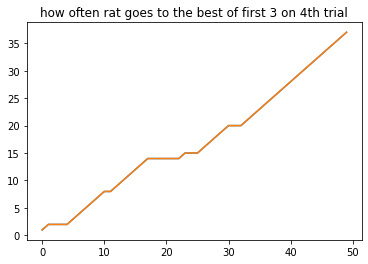

In [160]:
#ugh what i wanted to do now was fit a slope to each half of experiment 
#chose_best[2] = chose_best.notna
plt.plot((chose_best.notna()).cumsum())
plt.title('how often rat goes to the best of first 3 on 4th trial')
#maybe there is a big of a slop change here.. how can a confirm that? 

In [161]:
goes_best_fourth = (chose_best.notna()).cumsum()
first_half= goes_best_fourth.loc(int(len((goes_best_fourth)))/2)

ValueError: No axis named 25.0 for object type DataFrame

In [ ]:
first_half = goes_best_fourth.loc[0:int(len((goes_best_fourth))/2),:]
second_half = goes_best_fourth.loc[(int(len((goes_best_fourth))/2)+1):int(len((goes_best_fourth))),:]

In [ ]:
first_half
m, b = np.polyfit(first_half.iloc[:,1], 1)

In [ ]:
plt.plot(first_half.iloc[:,1], 'o')
plt.plot(m*first_half.iloc[:,0]+b )

In [ ]:
plt.plot(np.unique(first_half.iloc[:,0]), np.poly1d(np.polyfit(first_half.iloc[:,0]), first_half.iloc[:,1], 1))(np.unique(x))

In [ ]:
taking_out_zeroes= first_half[first_half.iloc[:,1].ne(first_half.iloc[:,1].shift())]
index=taking_out_zeroes.iloc[:,0]
vals = taking_out_zeroes.iloc[:,1]
plt.plot(vals)

In [ ]:
taking_out_zeroes2= second_half[second_half.iloc[:,1].ne(second_half.iloc[:,1].shift())]
index2=taking_out_zeroes2.iloc[:,0]
vals2 = taking_out_zeroes2.iloc[:,1]
plt.plot(vals2)
plt.plot(vals)

In [ ]:
df['rollingA'] = df.ChooseA.rolling(5, min_periods=1).mean()
df['rollingB'] = df.ChooseB.rolling(5, min_periods=1).mean()
df['rollingC'] = df.ChooseC.rolling(5, min_periods=1).mean()

In [ ]:
sesh_data = df.loc[df['sess_chng'] ==12]
sesh_data=sesh_data.loc[sesh_data['cont_num'] ==1]
session = sesh_data['session'].iloc[0]
day = sesh_data['day'].iloc[0]
cont = sesh_data['contingency'].iloc[0]


plt.figure(figsize = (50,20))


plt.plot(sesh_data.rollingA)
plt.plot(sesh_data.rollingB)
plt.plot(sesh_data.rollingC)
# plt.vlines(df[df['new_cont']==True].index,0,1,colors='black',linestyle='--',label='chg contingency')
# plt.vlines(df[df['day_chng']==True].index,0,1,colors='red',linestyle='-',label='new day')
# plt.vlines(df[df['sess_chng'].ne(df['sess_chng'].shift())==True].index,0,1,colors='pink',linestyle=':',label='chg epoch')
plt.legend(['A','B','C'],title='stem',loc='upper left', fontsize = 50)
plt.xlabel('trial #', fontsize = 50)
plt.ylabel('prop trials spent at each stem \nrolling avg, window=5', fontsize = 50)
plt.title(f'Proportion of trials spent at each stem across session.\n Day = {day}, \nSession = {session} \nContingency = {cont} ',fontsize = 50)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

# plt.plot(df2.rollingB)
# plt.plot(df2.rollingC)



In [ ]:
sesh_data